# Implementation of a ML Network to learn playing Jass

## Libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

## Play card ML

### Data import 

In [2]:
path_to_data = Path("/Users/flaviolazzarini/Documents/HSLU/2018HS/DL4G/DL4G_final/jass-demo/data/csv")
# Import only a fraction of data for efficient testing
data1 = pd.read_csv(path_to_data / 'MLAI_0-0_log.csv', header=None)
data2 = pd.read_csv(path_to_data / 'MLAI_1-0_log.csv', header=None)
data3 = pd.read_csv(path_to_data / 'MLAI_2-0_log.csv', header=None)
data4 = pd.read_csv(path_to_data / 'MLAI_3-0_log.csv', header=None)
data5 = pd.read_csv(path_to_data / 'MLAI_4-0_log.csv', header=None)
data6 = pd.read_csv(path_to_data / 'MLAI_5-0_log.csv', header=None)
data7 = pd.read_csv(path_to_data / 'MLAI_6-0_log.csv', header=None)
data8 = pd.read_csv(path_to_data / 'MLAI_7-0_log.csv', header=None)
data9 = pd.read_csv(path_to_data / 'MLAI_8-0_log.csv', header=None)
data10 = pd.read_csv(path_to_data / 'MLAI_9-0_log.csv', header=None)
data11 = pd.read_csv(path_to_data / 'MLAI_10-0_log.csv', header=None)
data = pd.concat([data1,data2, data3, data4, data5, data6, data7, data8, data9, data10, data11],axis=0, ignore_index=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,18
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,25
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,20
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,19
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,23


### Train & Test split

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[data.columns[0:191]], data[data.columns[191]], test_size=0.25, random_state=42)
print(x_train)
print(y_train)

         0    1    2    3    4    5    6    7    8    9   ...   181  182  183  \
1198670    0    0    0    0    0    0    0    0    1    1 ...     0    0    0   
903669     1    1    1    1    1    1    1    1    1    1 ...     0    0    0   
876483     1    0    1    0    0    0    0    0    0    1 ...     0    0    0   
2575945    0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
1383711    0    0    0    0    1    0    0    1    0    1 ...     0    0    0   
2220028    0    0    0    0    0    0    1    1    1    1 ...     0    0    0   
990151     1    0    0    1    1    0    0    1    0    0 ...     0    0    0   
299050     1    1    1    1    1    1    1    1    1    1 ...     0    0    0   
1560430    0    0    0    0    0    0    0    0    1    0 ...     0    0    0   
2043771    1    0    0    0    1    1    0    1    0    0 ...     0    0    0   
2400669    0    0    0    0    0    0    0    0    0    0 ...     0    0    0   
2353598    1    1    0    1 

### Train ML

In [4]:
model = keras.Sequential()
model.add(keras.layers.Dense(191, activation='relu', input_shape=[191]))
model.add(keras.layers.Dense(191, activation='relu'))
model.add(keras.layers.Dense(191, activation='relu'))
model.add(keras.layers.Dense(191, activation='relu'))
model.add(keras.layers.Dense(191, activation='relu'))
model.add(keras.layers.Dense(191, activation='relu'))
model.add(keras.layers.Dense(191, activation='relu'))
model.add(keras.layers.Dense(191, activation='relu'))
model.add(keras.layers.Dense(191, activation='relu'))
model.add(keras.layers.Dense(36, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
y_categorical = keras.utils.to_categorical(y_train)
history = model.fit(x_train, y_categorical, validation_split=0.25, epochs=50, batch_size=100)

Train on 1459215 samples, validate on 486405 samples
Epoch 1/50
1459215/1459215 [==============================] - 147s 101us/step - loss: 2.3775 - acc: 0.3065 - val_loss: 1.6144 - val_acc: 0.4718
Epoch 2/50
1459215/1459215 [==============================] - 140s 96us/step - loss: 1.1953 - acc: 0.5589 - val_loss: 1.1181 - val_acc: 0.5782
Epoch 3/50
1459215/1459215 [==============================] - 124s 85us/step - loss: 1.0139 - acc: 0.6052 - val_loss: 1.0801 - val_acc: 0.5872
Epoch 4/50
1459215/1459215 [==============================] - 132s 90us/step - loss: 0.9325 - acc: 0.6350 - val_loss: 0.9573 - val_acc: 0.6281
Epoch 5/50
1459215/1459215 [==============================] - 137s 94us/step - loss: 0.8840 - acc: 0.6524 - val_loss: 0.9962 - val_acc: 0.6190
Epoch 6/50
1459215/1459215 [==============================] - 130s 89us/step - loss: 0.8509 - acc: 0.6635 - val_loss: 0.8766 - val_acc: 0.6581
Epoch 7/50
1459215/1459215 [==============================] - 128s 87us/step - loss: 0.8

### Evaluate ML

In [5]:
y_categorical_test = keras.utils.to_categorical(y_test)
model.evaluate(x_test, y_categorical_test)

648540/648540 [==============================] - 27s 42us/step


[0.7422190812814355, 0.7134795078171918]

Text(0,0.5,'loss')

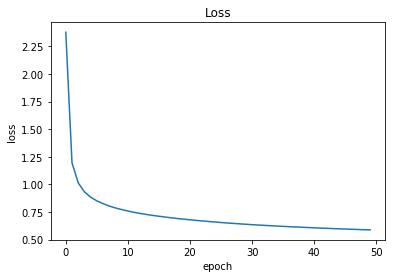

In [6]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

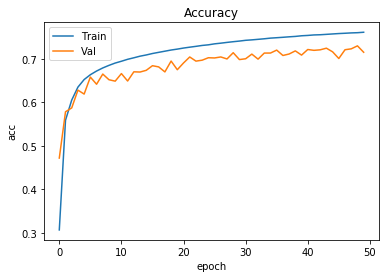

In [7]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

### Export ML Model

In [8]:
from tensorflow.keras.models import load_model
model.save(path_to_data / "final_bot_model_V7.h5")

### Versions

| Version | CSV | epoch | Batch size | Layers                    | Loss | Acc |
| ------- | --- | ----- | ---------- | ------------------------- | ---- | --- |
| V1      | 1   | 100   | 1000       | 2 relu & 1 softmax        | 1.2  | 0.5 |
| V2      | 2   | 100   | 1000       | 2 relu & 1 softmax        | 0.9  | 0.6 |
| -       | 2   | 100   | 10000      | 2 relu & 1 softmax        | 2.8  | 0.3 |
| V3      | 2   | 300   | 1000       | 2 relu & 1 softmax        | 0.8  | 0.6 |
| V4      | 2   | 120   | 1000       | 3 relu & 1 softmax        | 0.92 | 0.60|
| V5      | 2   | 120   | 1000       | 5 relu & 1 softmax        | 0.92 | 0.61|
| V6      | 2   | 50    | 100        | 9 relu & 1 softmax        | 1.0  | 0.62| 
| V7      | 11  | 50    | 100        | 9 relu & 1 softmax        | 0.74 | 0.71| --> Wurde implementiert in JassDemo

### Import ML Model

In [ ]:
# del model
# loaded_model = load_model("model_flavio.h5")
# loaded_model.evaluate(x_test, y_categorical_test)

## Trump Selection ML

### Data import 

In [ ]:
path_to_data = Path("C:\\Users\\matej\\Dropbox\\School\\HSLU\\HS18\\DL4G\\Final_Bot\\jass_data\\")
# Import only a fraction of data for efficient testing
data = pd.read_csv(path_to_data / '2017_10_11_trump.csv', header=None)
cards = [
# Diamonds
'DA','DK','DQ','DJ','D10','D9','D8','D7','D6',
# Hearts
'HA','HK','HQ','HJ','H10','H9','H8','H7','H6',
# Spades
'SA','SK','SQ','SJ','S10','S9','S8','S7','S6',
# Clubs
'CA','CK','CQ','CJ','C10','C9','C8','C7','C6'
]

# Forehand (yes = 1, no = 0)
forehand = ['FH']

user  = ['user']
trump = ['trump']

data.columns = cards + forehand + user + trump
data_columns_train = cards + forehand
data.drop('user', axis='columns', inplace=True)
data.head()

### Train & Test split

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[data_columns_train], data.trump, test_size=0.25,
                                                    stratify=data.trump, random_state=42)
print(x_train)
print(y_train)

### Train ML

In [ ]:
model = keras.Sequential()
model.add(keras.layers.Dense(37, activation='relu', input_shape=[37]))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(37, activation='relu'))
model.add(keras.layers.Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer='sgd',
              metrics=['accuracy'])
y_categorical = keras.utils.to_categorical(y_train)
history = model.fit(x_train, y_categorical, validation_split=0.25, epochs=50, batch_size=100)

### Evaluate ML

In [ ]:
y_categorical_test = keras.utils.to_categorical(y_test)
model.evaluate(x_test, y_categorical_test)

In [ ]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend(['Train', 'Val'], loc='upper left')

### Export Model

In [32]:
from tensorflow.keras.models import load_model
model.save(path_to_data / "final_bot_trump_model_V1.h5")

### Versions

| Version | CSV | epoch | Batch size | Layers                    | Loss | Acc |
| ------- | --- | ----- | ---------- | ------------------------- | ---- | --- |
| V1      | 1   | 2000  | 1000       | 2 relu & 1 softmax        | -    | 0.8 |
| V2      | 1   | 2000  | 10000      | 2 relu & 1 softmax        | 0.53 | 0.79|
| V3      | 1   | 500   | 10000      | 3 relu & 1 softmax        | 0.59 | 0.77|
| V4      | 1   | 500   | 10000      | 4 relu & 1 softmax        | 0.52 | 0.79| --> Wurde implementiert in JassDemo
| V5      | 1   | 200   | 1000       | 6 relu & 1 softmax        | 0.53 | 0.78|
| V6      | 1   | 150   | 100        | 6 relu & 1 softmax        | 0.52 | 0.79| 
| V7      | 1   | 50    | 100        | 8 relu & 1 softmax        | 0.54 | 0.78|

### Import ML Model

In [36]:
# del model
# loaded_model = load_model("model_flavio.h5")
# loaded_model.evaluate(x_test, y_categorical_test)